<a href="https://colab.research.google.com/github/Y-Tee23/CODSOFT/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [65]:
import pandas as pd
import numpy as np

#Models
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from lazypredict.Supervised import LazyRegressor

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# **2. Import and Read Data**

In [66]:
training_data = pd.read_csv("advertising.csv")

In [67]:
training_data.head()

,TV,Radio,Newspaper,Sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,12.00
3,151.50,41.30,58.50,16.50
4,180.80,10.80,58.40,17.90


# **3. Data Description**



*   TV - The cost of advertising on TV
*   Radio - The cost of advertising on Radio
*   Newspaper - The cost of advertising on Newspaper
*   Sales - The number of sales recieved from advertisement





# **4. Exploratory Data Analysis**

# 4.1 Data types, missing data and summary statistics

In [68]:
training_data.describe()

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


In [69]:
training_data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


<Axes: >

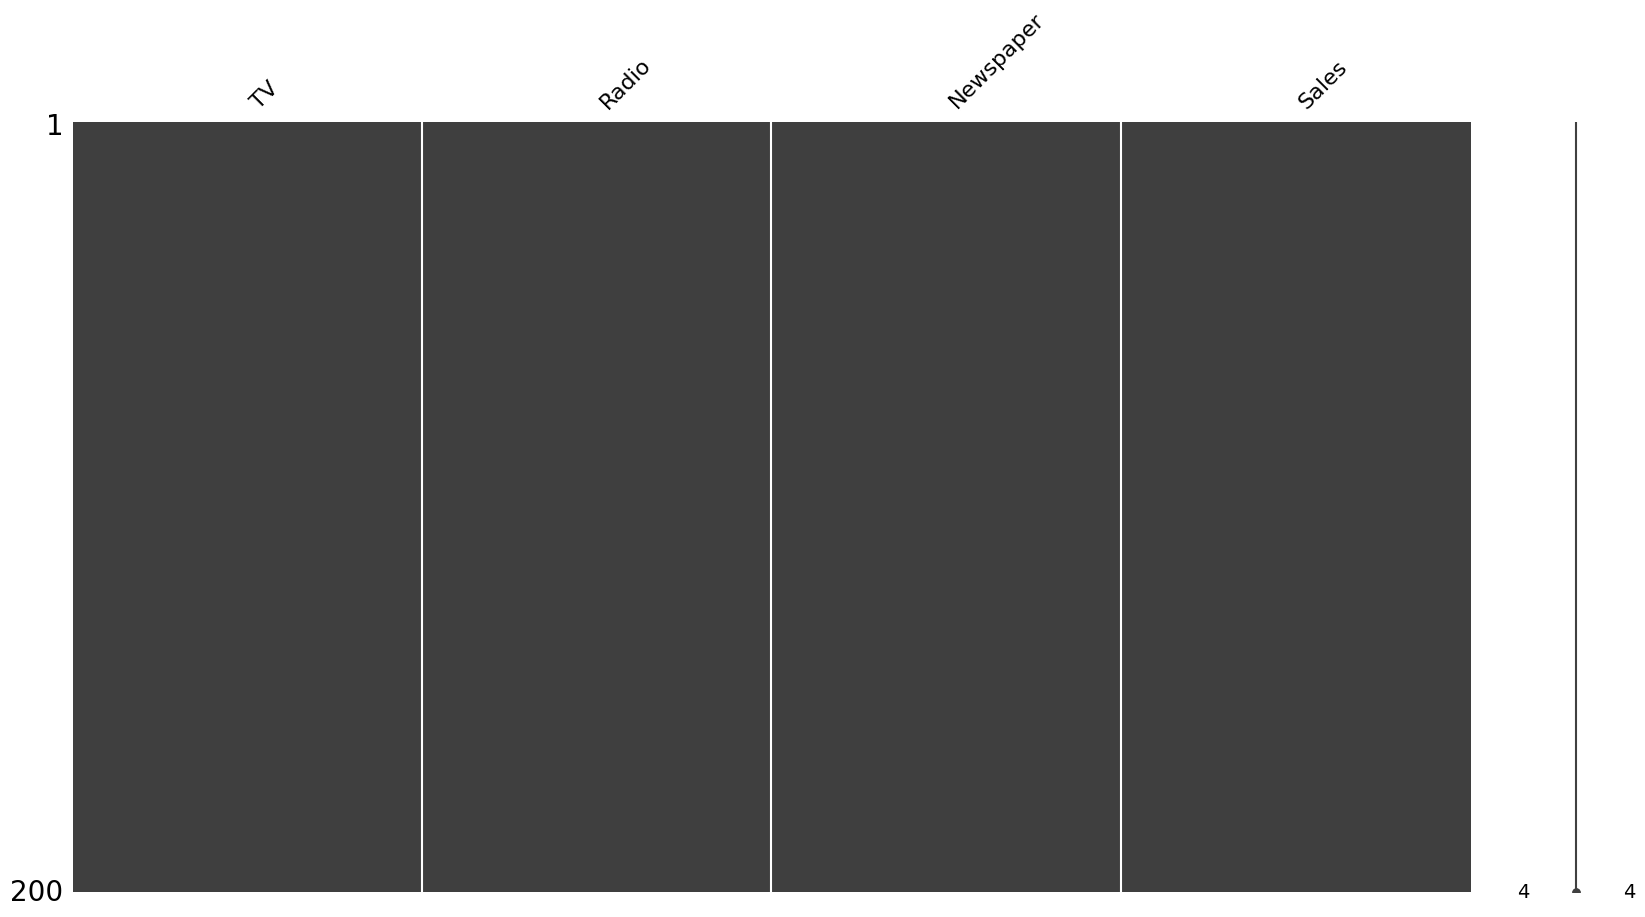

In [70]:
missingno.matrix(training_data, figsize=(20,10))

There is no missing data in our dataset

# 4.2 Feature Analysis

In [71]:
def printHistogram(data ,name):
  plt.hist(data, bins=10, color='orange', edgecolor='black')
  plt.title(name)
  plt.grid(False)
  plt.show()

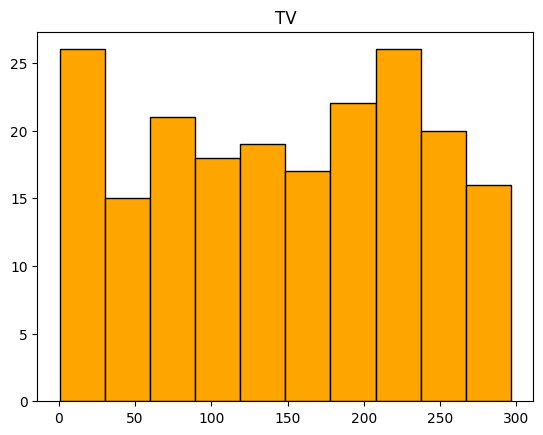

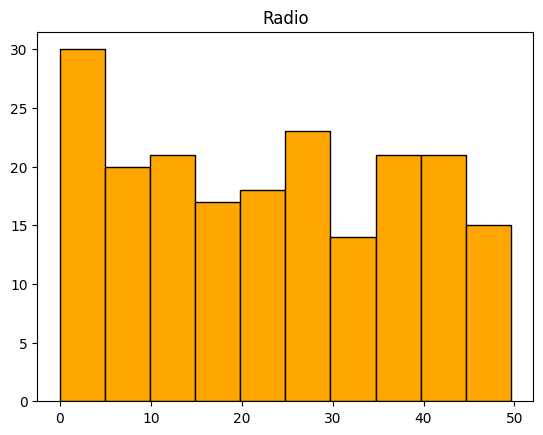

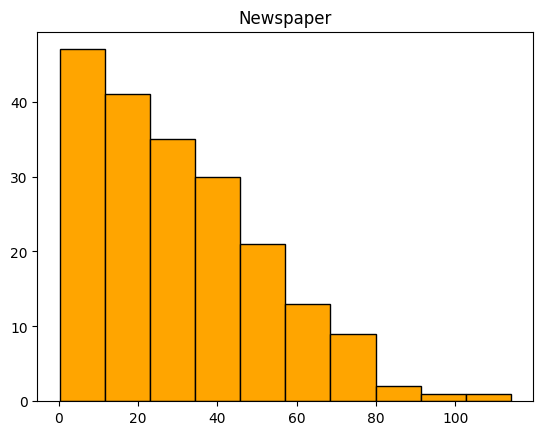

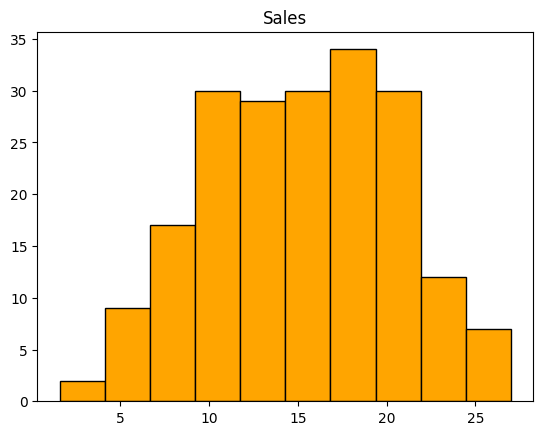

In [72]:
for i in training_data:
  printHistogram(training_data[i], i)

The Newspaper column has a positive skewness, so we will apply  Log transformation to rebalance the skewness

In [73]:
#Apply log transformation
training_data["Newspaper"] = training_data["Newspaper"].apply(np.sqrt)

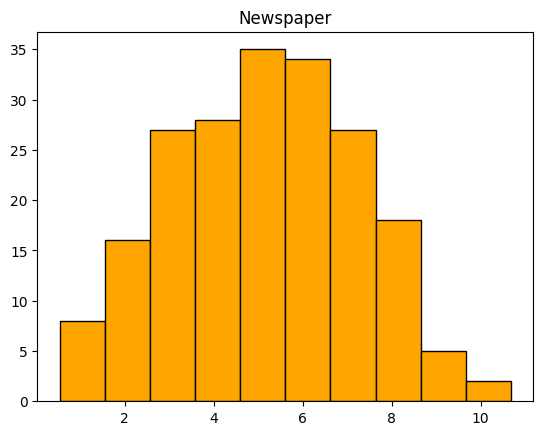

In [74]:
printHistogram(training_data["Newspaper"], "Newspaper")

Newspaper column is now evenly distributed.

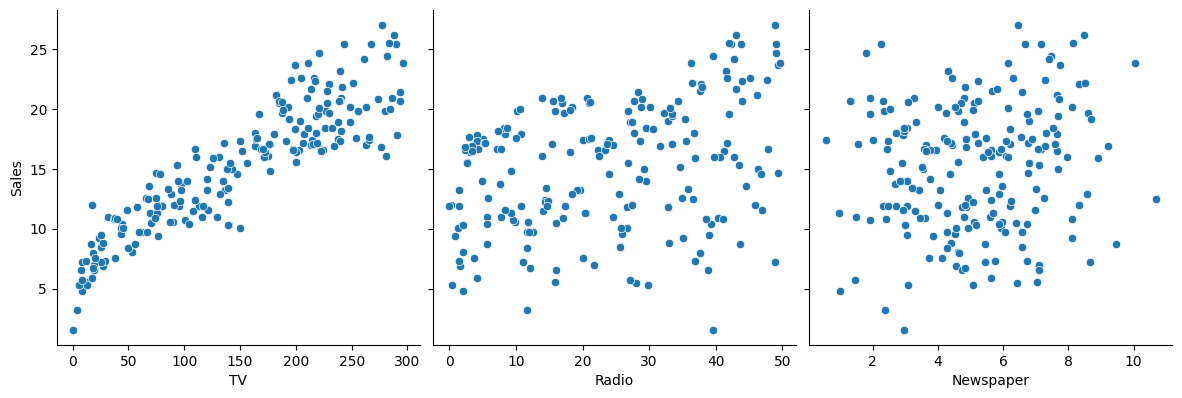

In [75]:
sns.pairplot(training_data, x_vars =['TV','Radio','Newspaper'],
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<Axes: >

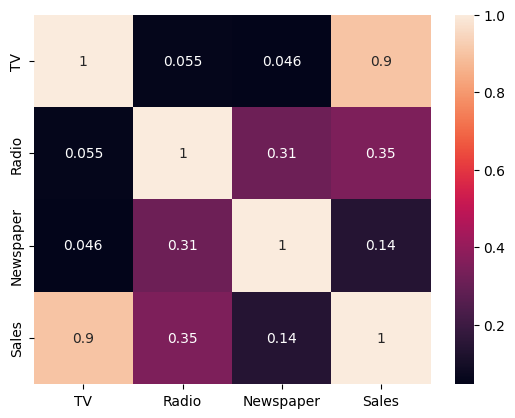

In [76]:
sns.heatmap(training_data.corr(), annot=True)

# 4.3 Feature Engineering

Let's add a new feature to see the total advertising budget

In [77]:
training_data['Total_Advertising_Budget'] = training_data['TV'] + training_data['Newspaper'] + training_data['Radio']

In [78]:
training_data.head()

,TV,Radio,Newspaper,Sales,Total_Advertising_Budget
0,230.10,37.80,8.32,22.10,276.22
1,44.50,39.30,6.72,10.40,90.52
2,17.20,45.90,8.32,12.00,71.42
3,151.50,41.30,7.65,16.50,200.45
4,180.80,10.80,7.64,17.90,199.24


Text(0.5, 1.0, 'Sale Probability by Budget')

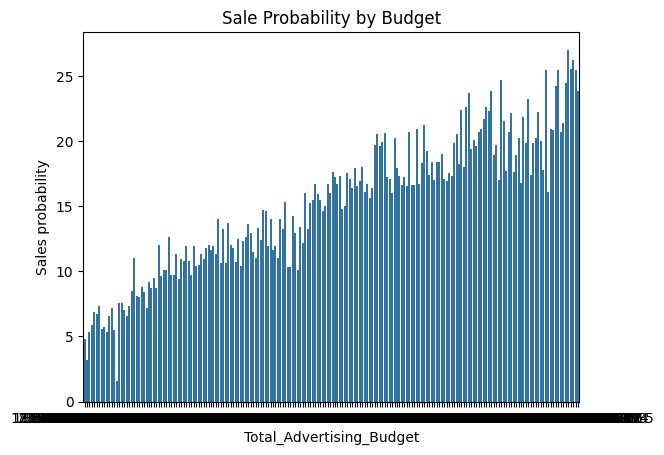

In [86]:
sns.barplot(x = "Total_Advertising_Budget", y= "Sales", data = training_data)
plt.ylabel("Sales probability")
plt.title("Sale Probability by Budget")

# **5. Model Building**

# 5.1 Feature Selection

In [79]:

X = training_data.drop(columns=['Sales'])
X_values = training_data.drop(columns=['Sales']).values
Y = training_data['Sales']
Y_values = training_data['Sales'].values



In [80]:

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_values, Y_values)
selected_features = X_values[:,rfe.support_]

print("Selected Features:", selected_features.shape[1])

Selected Features: 4


In [81]:
print(X.columns[rfe.support_])

Index(['TV', 'Radio', 'Newspaper', 'Total_Advertising_Budget'], dtype='object')


All features are valid to be selected

# **6. Training and Predicting**

In [82]:
X = training_data[['Newspaper', 'TV', 'Radio', "Total_Advertising_Budget"]]  # Features
Y = training_data['Sales']  # Target variable

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=42)

In [84]:
clf = LazyRegressor(verbose=0, ignore_warnings=False,custom_metric=None)
models, predictions= clf.fit(X_train,X_test,Y_train,Y_test)

 79%|███████▊  | 33/42 [00:01<00:00, 34.12it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:01<00:00, 28.53it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 4
[LightGBM] [Info] Start training from score 15.782143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [85]:
top_models = models[:5]
print(top_models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.94       0.94  1.27        0.10
ExtraTreesRegressor                          0.94       0.94  1.28        0.12
BaggingRegressor                             0.93       0.94  1.32        0.03
RandomForestRegressor                        0.93       0.93  1.35        0.15
HistGradientBoostingRegressor                0.92       0.93  1.41        0.10


The best performing model is GradientBoostingRegressor. It has the best Root Mean Squared Error value indicating better predictive accuracy.

Although BaggingRegressor is faster than GradientBoostingRegressor, it has a higher RMSE value. So the final model choice is GradientBoostingRegressor.